In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas_profiling
import graphviz

# Data
The iris dataset is a very popular dataset for basic classification. It contains data about flowers, and has 3 classes. The goal of this exercise is to create a model capable of classifying a given sample with the correct label. The sample is described by a list of attributes, otherwise known as features.

In [2]:
data = datasets.load_iris()
print(list(data.target_names))
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

['setosa', 'versicolor', 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Profile Report
The pandas_profiling library gives us access to a very powerful method: profile_report(). This method can be used to generate a report with lots of useful information about the data. This dataset is intentionally very simple and we won't have to modify the data to get good classification results, but in cases where we have more complicated data this report can get us started.

In [3]:
df.profile_report()

In [4]:
y = df.pop('target')

# Decision Tree
Decision Trees are a very popular starting point for classification tasks. One advantage is that they are interpretable: we can understand how they make their decisions. However, this comes with a tradeoff: they often don't perform as well as other algorithms may. This isn't going to be an issue with this dataset.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

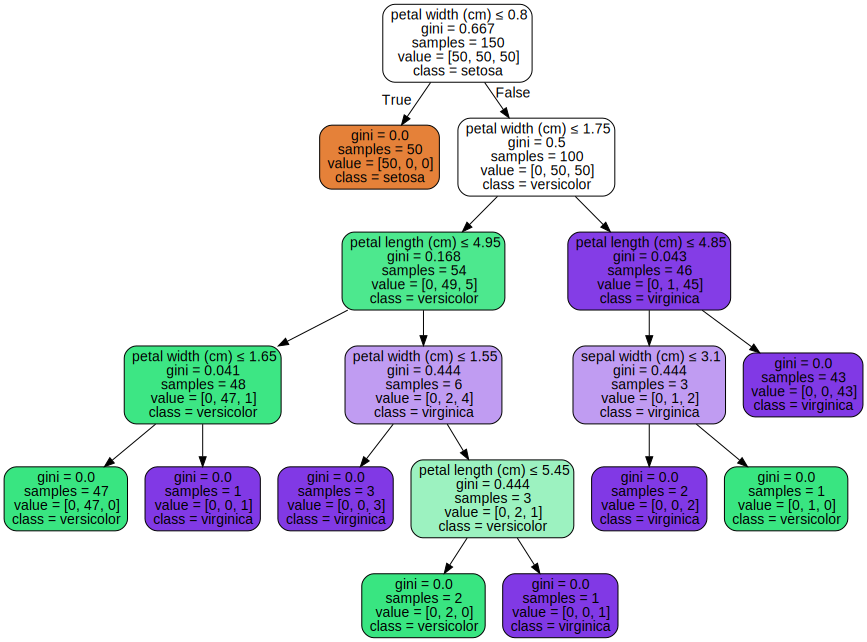

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=data.feature_names,  class_names=data.target_names,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [7]:
from sklearn.tree.export import export_text
r = export_text(clf, feature_names=list(df.columns))
print(r)

|--- petal_width_(cm) <= 0.80
|   |--- class: 0
|--- petal_width_(cm) >  0.80
|   |--- petal_width_(cm) <= 1.75
|   |   |--- petal_length_(cm) <= 4.95
|   |   |   |--- petal_width_(cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal_width_(cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal_length_(cm) >  4.95
|   |   |   |--- petal_width_(cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal_width_(cm) >  1.55
|   |   |   |   |--- petal_length_(cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal_length_(cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal_width_(cm) >  1.75
|   |   |--- petal_length_(cm) <= 4.85
|   |   |   |--- sepal_width_(cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal_width_(cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal_length_(cm) >  4.85
|   |   |   |--- class: 2



# Exercises
1. What is the difference between the output of the previous two cells? 
2. Do the same thing we did in this notebook with a provided dataset, Temeperature_Data.csv